In [1]:
import numpy as np
#matplotlib inline
import matplotlib.pyplot as plt
#Import LMfit to minimize chi^2.
import lmfit
from lmfit import Minimizer, Parameters, report_fit
from scipy.stats import norm
#from lmfit import minimize, Parameters
#Allows me to mess with recursion limit. Default probably 1000. Be careful!
import sys 
# generate random integer values
from random import seed
from random import random
from random import randint
#Numpy randoms give all outputs in arrays.
# from numpy.random import seed
# from numpy.random import randint


In [2]:
#Define constants.
A = 0.13
N = 1000000
loops = 100000
#rand_n = []
nbins = 100

#np.random.normal(n,dn)

#Define asymmetry with n events with uncertainty dn.
def Asym_Components(A,N):
    asym_comp = []
    asym_comp.append(A)
    asym_comp.append(N)
    npos = (A*N+N)/2
    asym_comp.append(npos)
    dnpos = npos*(1/np.sqrt(npos))
    asym_comp.append(dnpos)
    #Now choose how much the pos helicity value will be off by using a Gaussian centered on npos (the uncertainty on pos helicity counts) with a standard deviation of dnpos.
    npos_rand = np.random.normal(npos,dnpos)
    asym_comp.append(npos_rand)
    nneg = N-npos
    asym_comp.append(nneg)
    dnneg = nneg*(1/np.sqrt(nneg))
    asym_comp.append(dnneg)
    #Now choose how much the neg helicity value will be off by using a Gaussian centered on nneg (the uncertainty on pos helicity counts) with a standard deviation of dnneg.
    nneg_rand = np.random.normal(nneg,dnneg)
    asym_comp.append(nneg_rand)
    asym_rand = (npos_rand-nneg_rand)/(npos_rand+nneg_rand)
    asym_comp.append(asym_rand)
    return asym_comp

print('Asym Components = ',Asym_Components(A,N))

#np.random.normal(n,dn)
#print('Random n = ',np.random.normal(n,dn))

Asym Components =  [0.13, 1000000, 565000.0, 751.6648189186454, 565377.0122345298, 435000.0, 659.545297913646, 433485.76839904295, 0.13204140387714622]


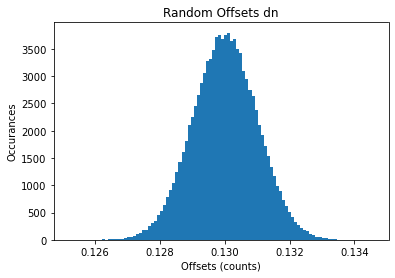

In [3]:
asym_vals = []

#Generate a bunch of asymmetries with the counting uncertainty on +/- helicity.
for i in range(loops):
    asym_val = Asym_Components(A,N)
    asym_vals.append(asym_val[8])
    
#print(asym_vals)

#mu, std = norm.fit(asym_vals)
#print(mu,std)

# Plot the PDF.
#xmin = -0.01
#xmax = 0.05
#x = np.linspace(xmin, xmax, 1000)
#p = norm.pdf(x, mu, std)
#plt.plot(x, p, 'k', linewidth=2)

x,y = np.loadtxt('Asymmetry_Uncertainty_Helicity.txt', skiprows=0, unpack=True)

(hn,hbins,patches) = plt.hist(asym_vals, nbins)

file1 = open("Asymmetry_Uncertainty_Helicity.txt","w") 
for i in range(len(hn)):
    file1.write(str((hbins[i]+hbins[i+1])/2))
    file1.write(' ')
    file1.write(str(hn[i]))
    file1.write('\n')
file1.close() 

plt.title('Random Offsets dn')
plt.xlabel('Offsets (counts)')
plt.ylabel('Occurances')
plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 100
    # variables        = 3
    chi-square         = 90732.1965
    reduced chi-square = 935.383469
    Akaike info crit   = 687.049737
    Bayesian info crit = 694.865247
[[Variables]]
    sigma:      9.9490e-04 +/- 2.7344e-06 (0.27%) (init = 0.001134507)
    center:     0.12999716 +/- 2.7344e-06 (0.00%) (init = 0.1300232)
    amplitude:  8.73078055 +/- 0.02078091 (0.24%) (init = 11.95317)
    fwhm:       0.00234280 +/- 6.4390e-06 (0.27%) == '2.3548200*sigma'
    height:     3500.94317 +/- 8.33289089 (0.24%) == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.250)
    C(sigma, amplitude) =  0.577



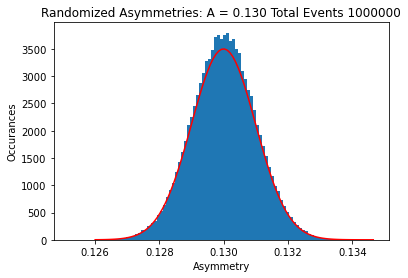

In [4]:
#Import lmfit Model for the least squares minimization.
from lmfit import Model
from lmfit.models import GaussianModel
mod = GaussianModel()

pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x)
print(out.fit_report(min_correl=0.25))

#def gaussian(x, mu, sig):
#    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

#mu = A
#sig = 0.01

plt.plot(x, out.best_fit, 'r-')
plt.hist(asym_vals, nbins)
plt.title('Randomized Asymmetries: A = %.3f Total Events %.f' %(A,N))
plt.xlabel('Asymmetry')
plt.ylabel('Occurances')
plt.show()